# Atividade 2 - Processamento de Sinais  
*ALUNO*: João Victor Campos Costa - 2020035272  
numpy: https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq

# 1. Transformadas de Fourier de formas de onda de exemplo.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt
#%matplotlib inline 
#%config InlineBackend.figure_format = 'svg'

In [4]:
piano = np.loadtxt("piano.txt")
trumpet = np.loadtxt("trumpet.txt") 

Text(0.5, 1.0, 'Trompete')

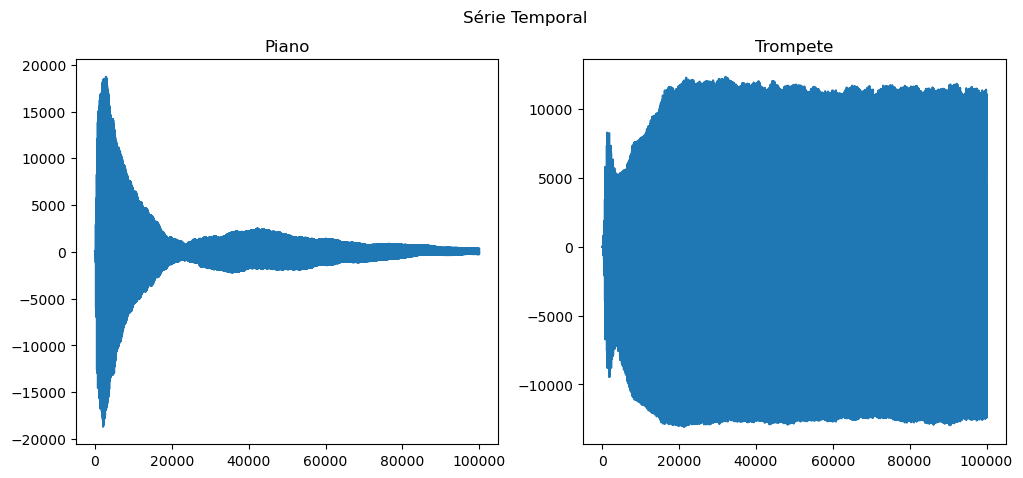

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plt.suptitle("Série Temporal")
ax1.plot(piano)
ax1.set_title("Piano")

ax2.plot(trumpet)
ax2.set_title("Trompete")

Dá para ver que o som do piano é mais intenso no início correspondendo a "martelada" na nota, enquanto que o trompete possui a intensidade igual ao longo do tempo pelo sopro ser o mesmo.

In [6]:
# Dados reais -> rfft
FT_piano = np.fft.rfft(piano) 
FT_trumpet = np.fft.rfft(trumpet) 

In [7]:
fs = 44_100
piano_frequencies = np.fft.fftfreq(n=piano[:10_000].size, d=1/fs)
trumpet_frequencies = np.fft.fftfreq(n=trumpet[:10_000].size, d=1/fs)

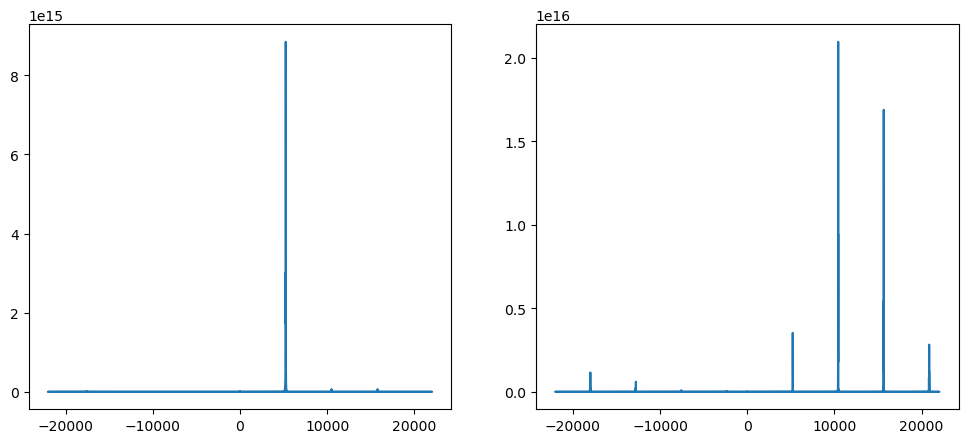

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# 
ax1.plot(piano_frequencies, np.abs(FT_piano[:10_000])**2 )
ax2.plot(trumpet_frequencies, np.abs(FT_trumpet[:10_000])**2)


**Não entendi essa parte da atividade !!!**

# 2. Filtragem e suavização de Fourier

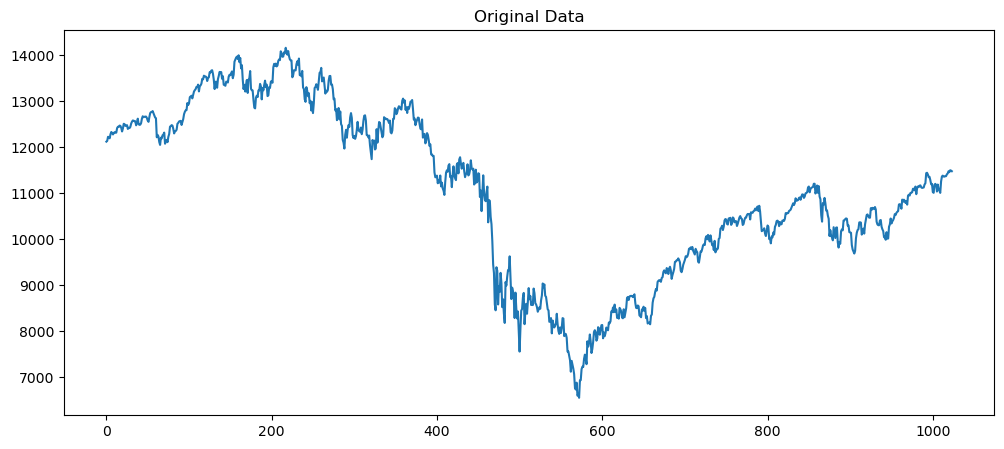

In [10]:
# a) Leia os dados e coloque os em um gráfico
dow_data = np.loadtxt("dow.txt")
plt.figure(figsize=(12,5))
plt.title("Original Data")
plt.plot(dow_data)

In [11]:
# b) calcule os coeficientes dos dados usando rfft
FFT_dow = np.fft.rfft(dow_data)

In [12]:
# c) Defina os últimos 90% como zero
filter = int(FFT_dow.size * 0.10)
FFT_dow10 = FFT_dow.copy()
FFT_dow10[filter:] = 0

In [13]:
# d) Calcule a transf. inversa da matriz resultante
ift_dow10 = np.fft.irfft(FFT_dow10)

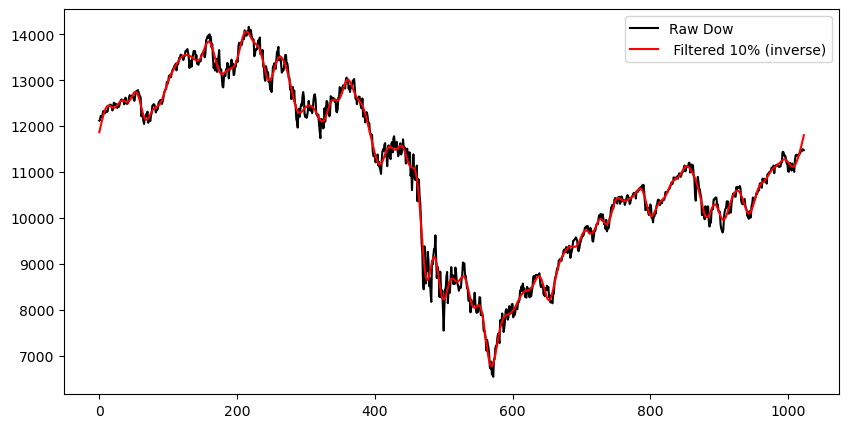

In [14]:
# e plote no mesmo gráfico do dados originais
fig = plt.figure(figsize=(10, 5))

plt.plot(dow_data, 'k', label='Raw Dow')
plt.plot(ift_dow10, 'red', label=' Filtered 10% (inverse)')
plt.legend()

In [15]:
# e) Modifique seu programa fazendo apenas os 2% primeiros não-nulos
filter = int(FFT_dow.size * 0.02)
FFT_dow002 = FFT_dow.copy() 
FFT_dow002[filter:] = 0
ift_dow002 = np.fft.irfft(FFT_dow002)

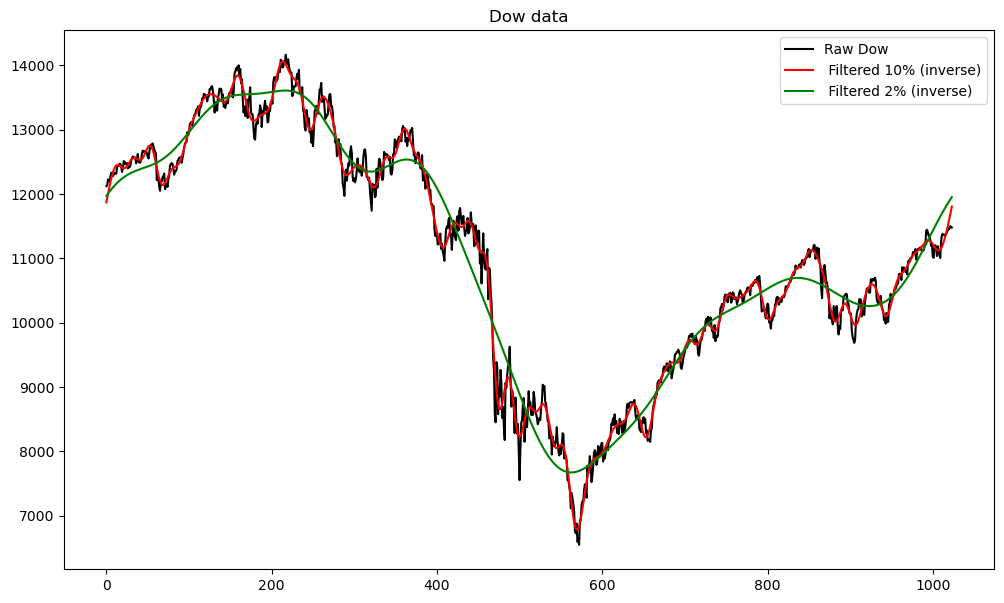

In [78]:
# Plote todos no mesmo gráfico
fig , ax1 = plt.subplots(figsize=(12,7))

ax1.set_title("Dow data")
ax1.plot(dow_data, 'k', label='Raw Dow')
ax1.plot(ift_dow10, 'red', label=' Filtered 10% (inverse)')
ax1.plot(ift_dow002, 'green', label=' Filtered 2% (inverse)')
ax1.legend()

# ax2.set_title("Fourier Transform of Dow Data")
# ax2.plot(FFT_dow, label="FFT original Data", ls='-', color='black')
# ax2.plot(FFT_dow10, label="Filtered 10%", ls='--')
# ax2.plot(FFT_dow002, label='Filtered 2%', ls='dotted')
# # ax2.set_xlim([0,100])
# ax2.legend()


A medida que se aumenta o filtro, o ajuste se torna cada vez mais suave, em compensação perde-se bastante informação.

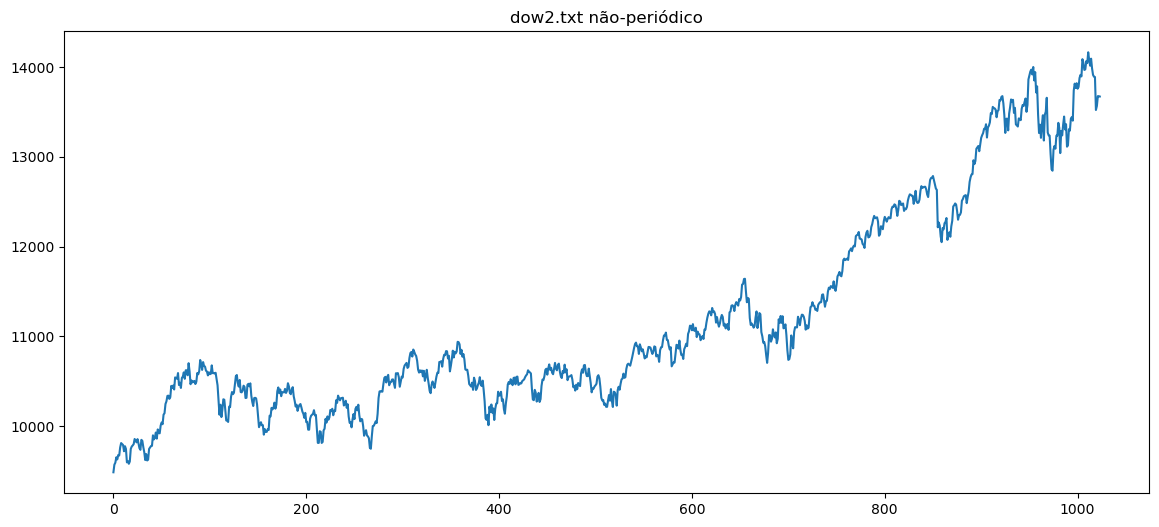

In [82]:
# item f) dow2.txt
dow2_data: np.ndarray = np.loadtxt('dow2.txt')
plt.figure(figsize=(14, 6))
plt.plot(dow2_data)
plt.title('dow2.txt não-periódico');

In [18]:
# Transformada dos dados completos
FFT_dow2 = np.fft.rfft(dow2_data)
filter = int(FFT_dow2.size * 0.02)
# Aplicação do filtro
FFT_dow2_002 = FFT_dow2.copy()
FFT_dow2_002[filter:] = 0

In [19]:
# Inversa dos 2%
ift_dow_002 = np.fft.irfft(FFT_dow2_002)


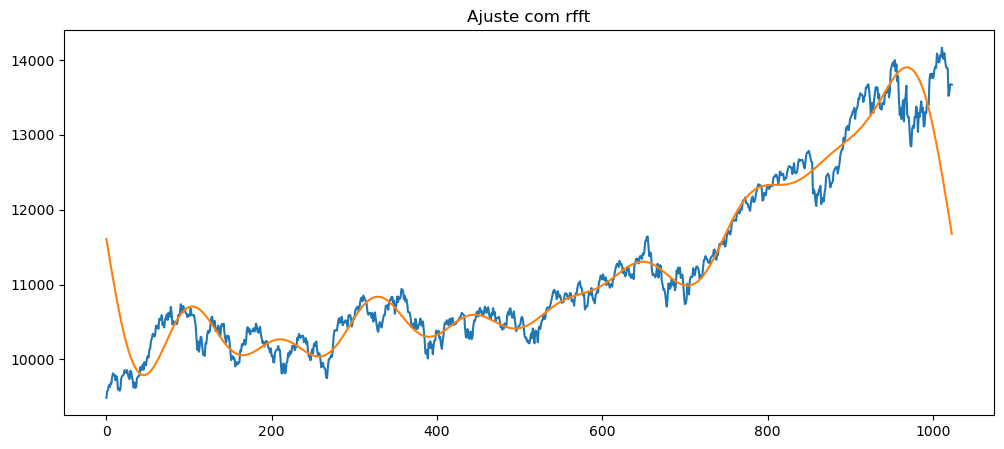

In [86]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(dow2_data)
ax.plot(ift_dow_002)
ax.set_title("Ajuste com rfft");

### Tranformada discreta de Cosseno - Digressão  
Ao que entendi, a FFT real trabalha com sinais reais e simétricos. O espectro após a transformada continua sendo mistura de reais e complexos, no entanto pela simetria perde-se informação no espectro resultante, sendo este a metade do sinal de entrada.  

Agora a DCT utiliza apenas cossenos representando o espectro inteiro "sem perda" de informação. Por esse motivo, é utilizado em compressão de áudios e imagens pois pode-se aplicar filtros a uma gama maior de coeficientes de Fourier.  

`No exemplo da atividade sobre compressão de imagens`, a compressão de imagem com filtros de 20, 50 e 100 era pouco distintas. Fiz um chute com 5000, bem exagerado, para ter a visualização da perda de qualidade da imagem.




In [89]:
from dcst import dct, idct

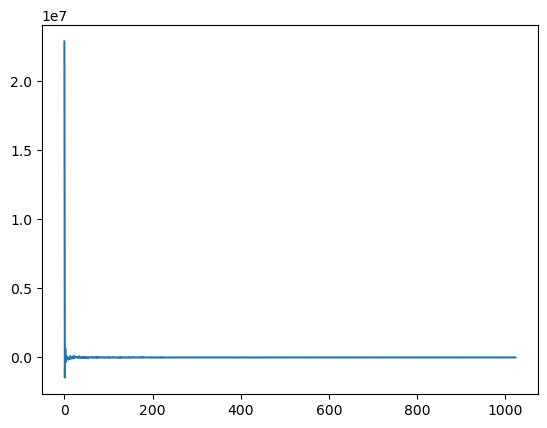

In [23]:
dcst_dow2 = dct(dow2_data)
plt.plot(dcst_dow2)


In [24]:
dcst_dow_002 = dcst_dow2.copy()
filter = int(dcst_dow_002.size*0.02)
dcst_dow_002[filter:] = 0


In [25]:
idcst_dow_002 = idct(dcst_dow_002)

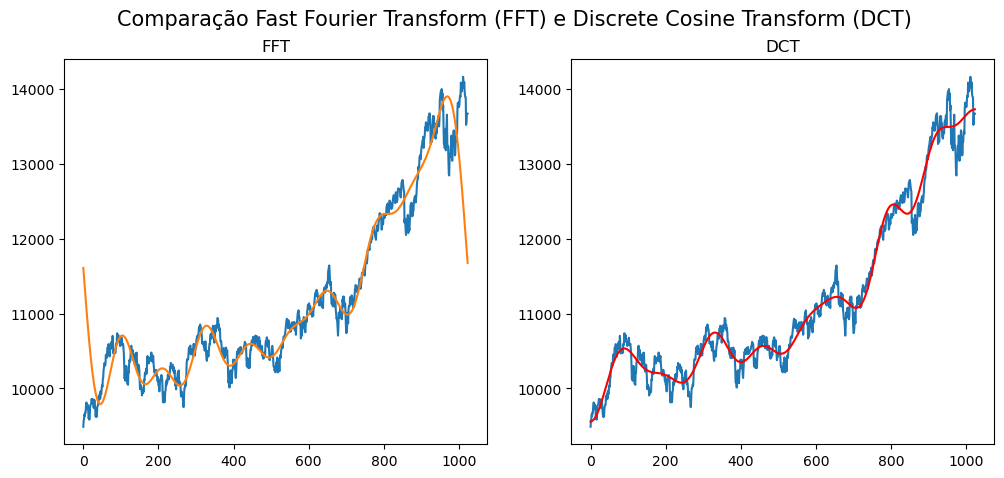

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2,  figsize=(12, 5))

fig.suptitle("Comparação Fast Fourier Transform (FFT) e Discrete Cosine Transform (DCT)", size=15);

ax1.set_title("FFT")
ax1.plot(dow2_data)
ax1.plot(ift_dow_002)

ax2.set_title("DCT")
ax2.plot(dow2_data)
ax2.plot(idcst_dow_002, color='red')



Percebe-se que o uso da DCT corrige os artefatos indesejados da extremidade, ocasionados pelo sinal não ser simétrico (ou periódico)

# 3. Compressão de Imagem

In [28]:
from dcst import dct2, idct2

### a)

 Valor máximo = 255.0 e valor mínimo = 0.0 | Escala de cinza.
 house_data.shape=(1024, 1024) house_data.size=1048576


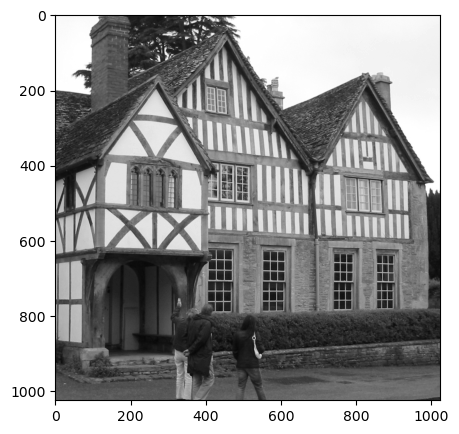

In [30]:
# a) 
house_data = np.loadtxt("house.txt")
fig , ax1 = plt.subplots(figsize=(12,5))
ax1.imshow(house_data, cmap='gray')

print(f" Valor máximo = {house_data.max()} e valor mínimo = {house_data.min()} | Escala de cinza.")
print(f" {house_data.shape=} {house_data.size=}")

### b) 

In [32]:
"""
Questão b
"""
# tamanho do bloco
block_size = 16

container = np.zeros_like(house_data)

for i in range(0, house_data.shape[0], block_size):
    for j in range(0, house_data.shape[1], block_size):
        block = house_data[i: i+block_size, j: j+ block_size]
        
        # Transformada no bloco
        FT_block = dct2(block)
        
        # Adicionar ao Container
        container[i: i+block_size, j: j+ block_size] = FT_block
        

In [33]:
FT_house = container.copy()

### c) e d) Análise dos coeficientes e taxa de compressão

In [35]:
"""
Questão d
"""
condition_10: np.ndarray[bool] = (np.abs(container) < 10) * (np.abs(container) > -10)
true_elements = np.sum(np.sum(condition_10))
false_elements = container.size - true_elements

print(f" nº de coeficiente definidos como zero: {false_elements}")
print(f" taxa de compressão: {true_elements / house_data.size}")

######### APLICAÇÃO DO FILTRO ############
container[condition_10] = 0

 nº de coeficiente definidos como zero: 769128
 taxa de compressão: 0.26650238037109375


### e) Descompressão - Transformada Inversa

In [37]:
# tamanho do bloco
block_size = 16

container_inverse = np.zeros_like(house_data)

for i in range(0, house_data.shape[0], block_size):
    for j in range(0, house_data.shape[1], block_size):
        container_block = container[i: i+block_size, j: j+ block_size]
        
        # Transformada no bloco
        IFT_block = idct2(container_block)
        
        # Adicionar ao Container
        container_inverse[i: i+block_size, j: j+ block_size] = IFT_block

### f) Imagem Descompactada

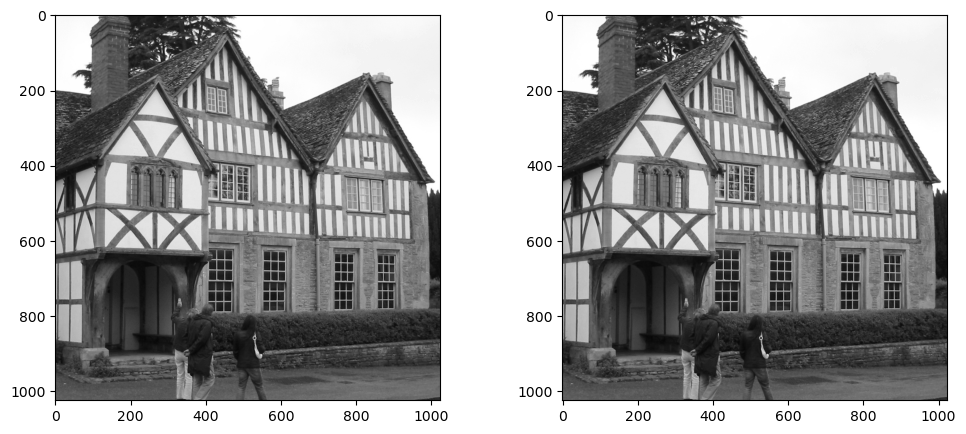

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.imshow(container_inverse, cmap='gray' )
ax2.imshow(house_data, cmap='gray')



### g) Aumento do valor limite (20, 50, ou 100)

In [41]:
## Criaremos container para 20, 50 e 100

container_20 = FT_house.copy()
container_50 = FT_house.copy()
container_100 = FT_house.copy()

condition_20: np.ndarray[bool] = (np.abs(container_20) < 20) * (np.abs(container_20) > -20)
condition_50: np.ndarray[bool] = (np.abs(container_50) < 50) * (np.abs(container_50) > -50)
condition_100: np.ndarray[bool] = (np.abs(container_100) < 5000) * (np.abs(container_100) > -5000)


# Zerando de acordo com o criterio 
container_20[condition_20] = 0
container_50[condition_50] = 0
container_100[condition_100] = 0


# A serem preenchidos no loop
container_inverse_20 = np.zeros_like(house_data)
container_inverse_50 = np.zeros_like(house_data)
container_inverse_100 = np.zeros_like(house_data)

for i in range(0, house_data.shape[0], block_size):
    for j in range(0, house_data.shape[1], block_size):
        container_block_20 = container_20[i: i+block_size, j: j+ block_size]
        container_block_50 = container_50[i: i+block_size, j: j+ block_size]
        container_block_100 = container_100[i: i+block_size, j: j+ block_size]
        
        # Transformadas inversas no blocos
        IFT_block_20, IFT_block_50, IFT_block_100  = idct2(container_block_20), idct2(container_block_50), idct2(container_block_100)
        
        # Adicionar ao Container
        container_inverse_20[i: i+block_size, j: j+ block_size] = IFT_block_20
        container_inverse_50[i: i+block_size, j: j+ block_size] = IFT_block_50
        container_inverse_100[i: i+block_size, j: j+ block_size] = IFT_block_100

#### analisando as imagens

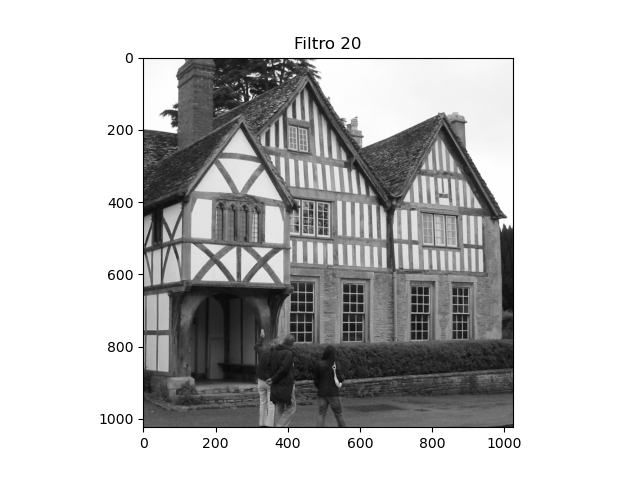

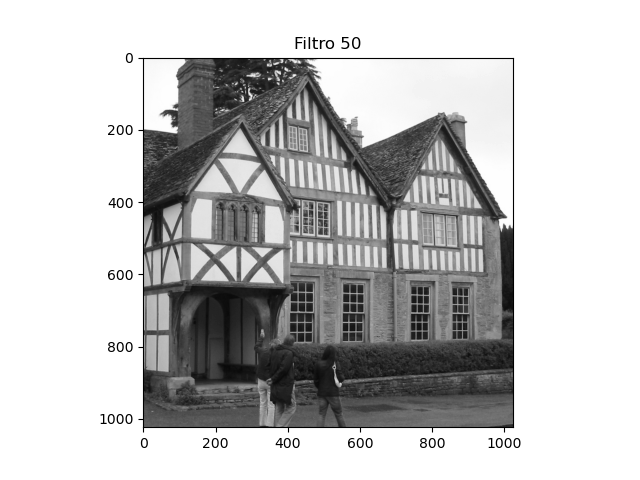

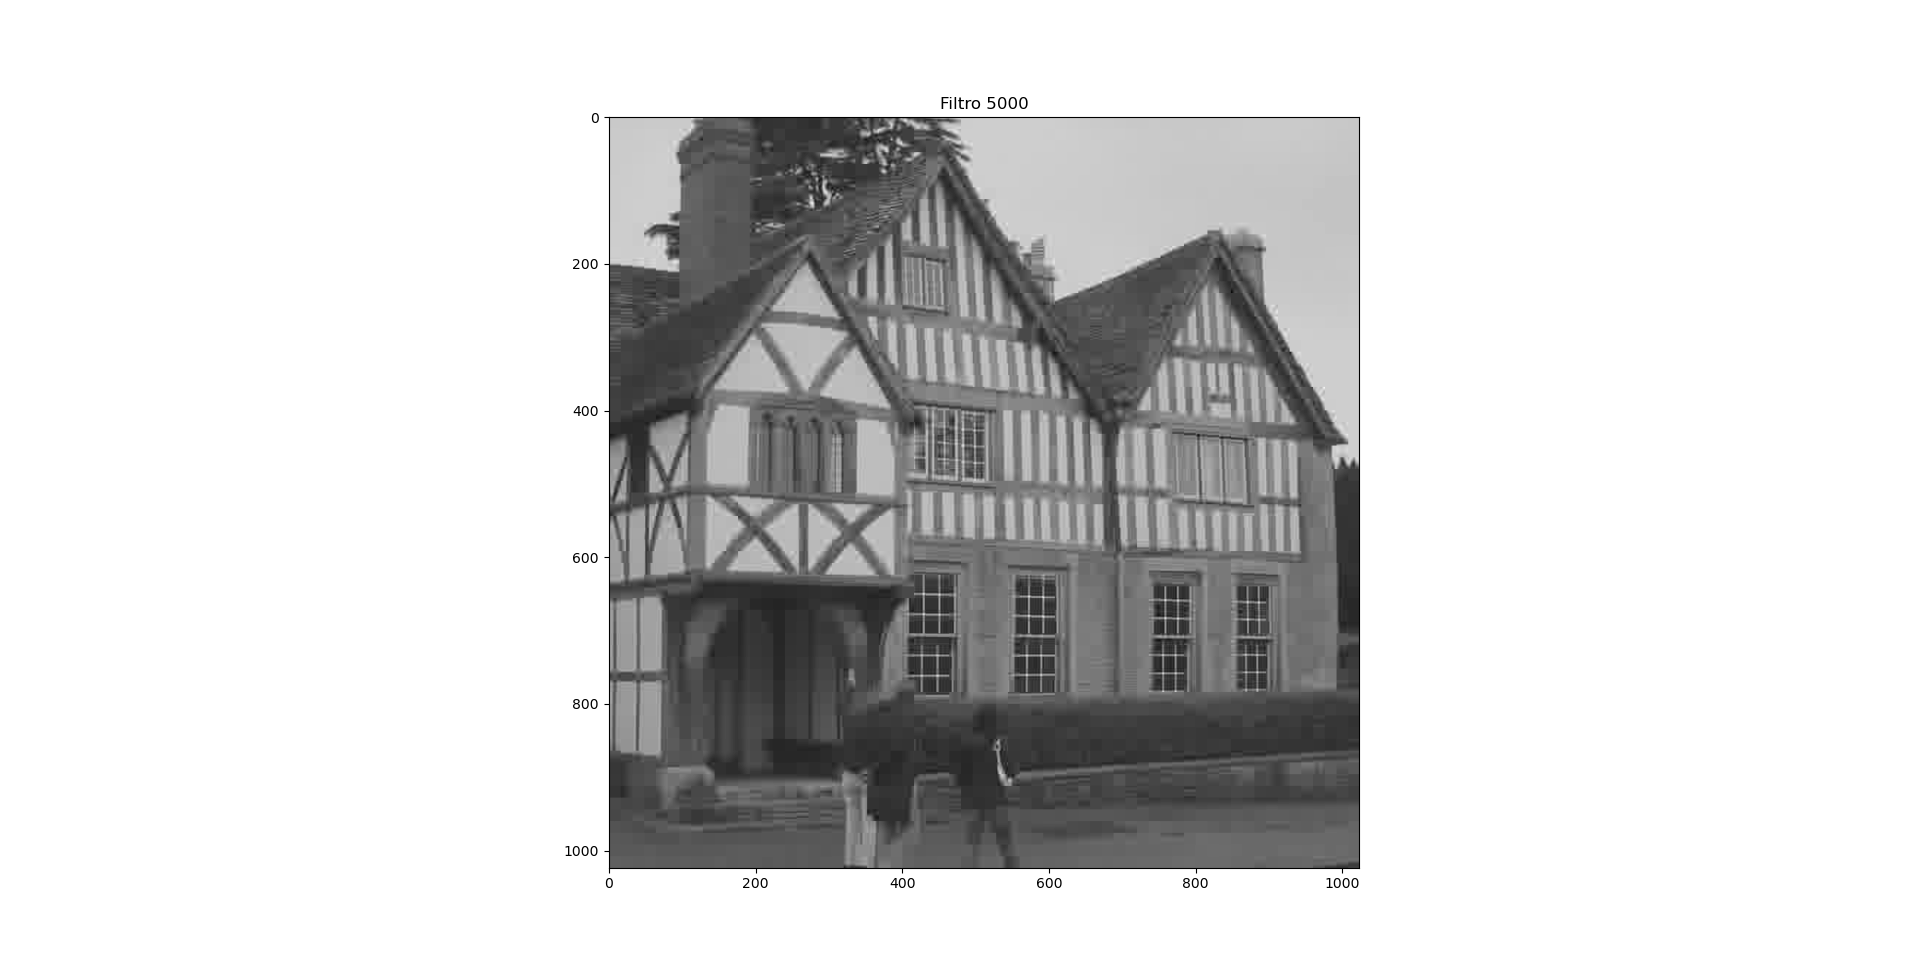